# <a id="#">Task 3 – Mean, median, and Gaussian filtering</a>

In [2]:
import numpy
import matplotlib.pyplot as plt

---

## Linear filtering by convolution (mean filter)

**<a id="#">Task 3.1.1.</a>** Load the image `data/astronaut.png` and show it:

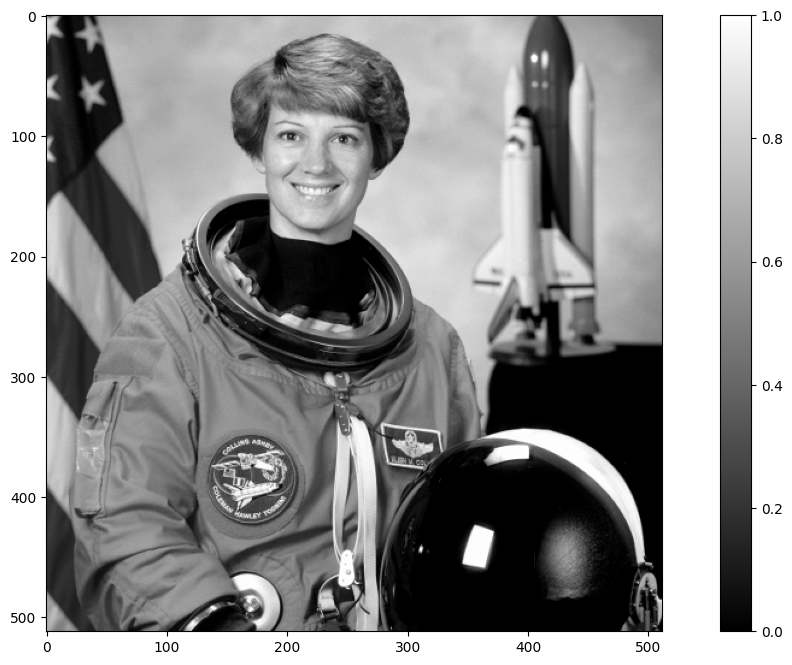

In [3]:
img = plt.imread('data/astronaut.png')
plt.figure(figsize=(15,8))
plt.imshow(img, 'gray')
plt.colorbar()

**<a id="#">Task 3.1.2.</a>** Implement a mean filter:

In [4]:
# def meanfilter(img_in, size):
    result = numpy.zeros(img_in.shape)
    n = (size - 1) // 2
    for p in numpy.ndindex(img_in.shape):
        i, j = p
        if i < n or i >= img_in.shape[0] - n:
            continue
        if j < n or j >= img_in.shape[1] - n:
            continue
        neighborhood_sum = 0
        for q in numpy.ndindex(size, size):
            neighborhood_sum = neighborhood_sum + img_in[p[0]-n+q[0], p[1]-n+q[1]]
        result[p] = neighborhood_sum / (size*size)
    return result

IndentationError: unexpected indent (2105582248.py, line 2)

In [ ]:
# Rosmin: def meanfilter(img_in, size):
    result = numpy.zeros(img_in.shape)
    n = (size - 1) // 2
    for p in numpy.ndindex(img_in.shape):
        neighborhood_sum = 0
        if p[0]<n or p[0]>=(img_in.shape[0]-n) or p[1]<n or p[1]>=(img_in.shape[1]-n):
            result[p]=0
        else:
            for q in numpy.ndindex(size, size):
                neighborhood_sum = neighborhood_sum + img_in[p[0]-n+q[0], p[1]-n+q[1]]
            result[p] = neighborhood_sum / (size*size)
    return result

In [ ]:

def meanfilter(img_in, size):
    result = numpy.zeros(img_in.shape)
    n = (size - 1) // 2
    for p in numpy.ndindex(img_in.shape):
        i, j = p
        if i in range(n, img_in.shape[0] - n):
            if j in range(n, img_in.shape[1] - n):
                neighborhood_sum = 0
                for q in numpy.ndindex(size, size):
                    neighborhood_sum = neighborhood_sum + img_in[p[0]-n+q[0], p[1]-n+q[1]]
                result[i,j] = neighborhood_sum / (size*size)
    return result

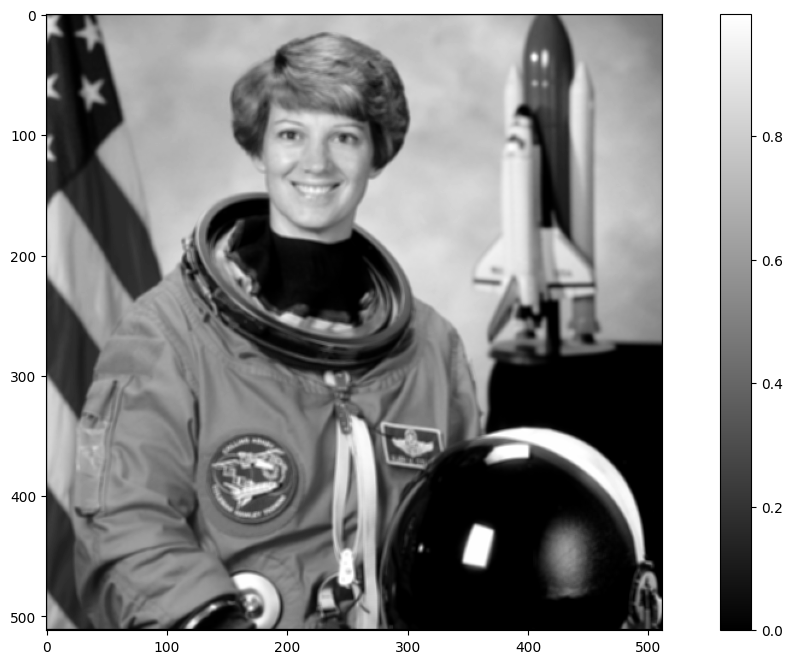

In [11]:
img_mean = meanfilter(img, 3)
plt.figure(figsize=(15,8))
plt.imshow(img_mean, 'gray')
plt.colorbar()

**<a id="#">Task 3.1.3.</a>** Test your implementation from above by using the function `meanfilter` for the previously loaded image and show the result:

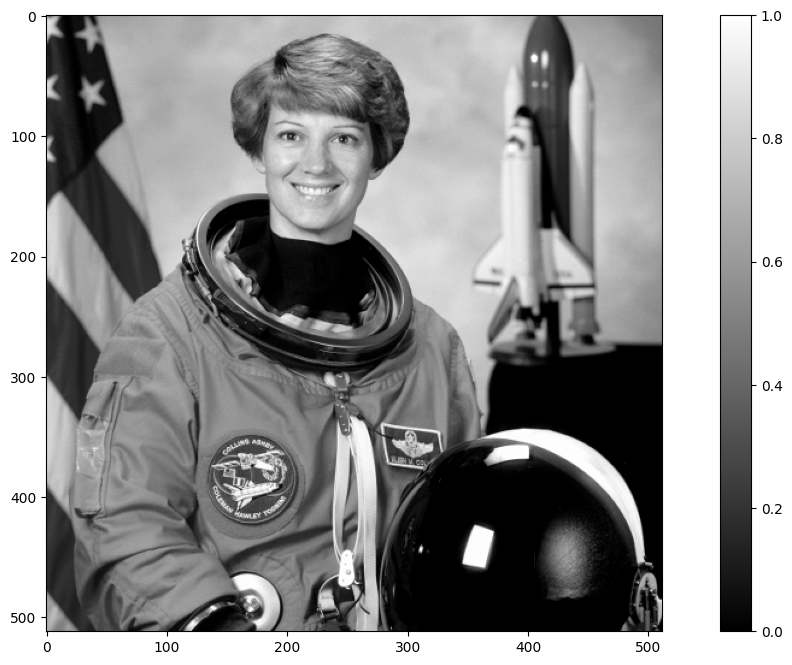

In [7]:
img1 = img.copy()
meanfilter(img1, 5)
plt.figure(figsize=(15,8))
plt.imshow(img1, 'gray')
plt.colorbar()

**<a id="#">Task 3.1.4.</a>** Compare your result for filter size `5` with the correct result image `data/astronaut_meanfilter5.png`:

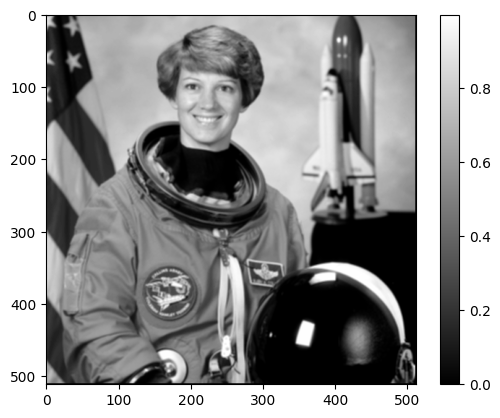

In [19]:
img_mean_5 = meanfilter(img, 5)
plt.imshow(img_mean, 'gray')
plt.colorbar()

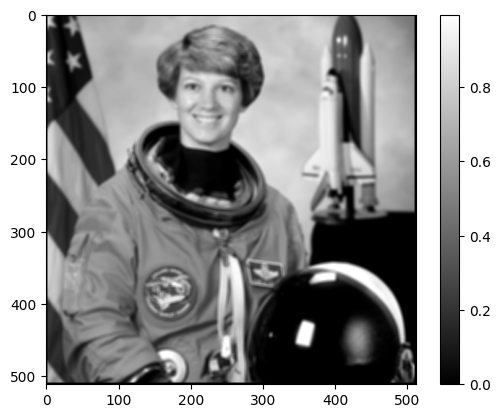

In [17]:
meanf_5_ref = plt.imread('data/astronaut_meanfilter5.png')
plt.imshow(meanf_5_ref, 'gray')
plt.colorbar()

In [21]:
assert numpy.allclose(img_mean_5, meanf_5_ref, atol=1/255)

---

## Non-linear filtering

**<a id="#">Task 3.2.1.</a>** Implement a median filter:

In [13]:

def medianfilter(img_in, size):
    result = numpy.zeros(img_in.shape)
    n = (size - 1) // 2
    for p in numpy.ndindex(img_in.shape):
        i, j = p
        neighborhood_values=list()
        if i in range(n, img_in.shape[0] - n):
            if j in range(n, img_in.shape[1] - n):
                neighborhood_sum = 0
                for q in numpy.ndindex(size, size):
                    neighborhood_values.append(img_in[p[0]-n+q[0], p[1]-n+q[1]])
                neighborhood_values.sort()
                result[i,j] = neighborhood_values[(size*size)//2]
    return result

**<a id="#">Task 3.2.2.</a>** First, test your implementation from above by using the function `medianfilter` for the previously loaded image and show the result:

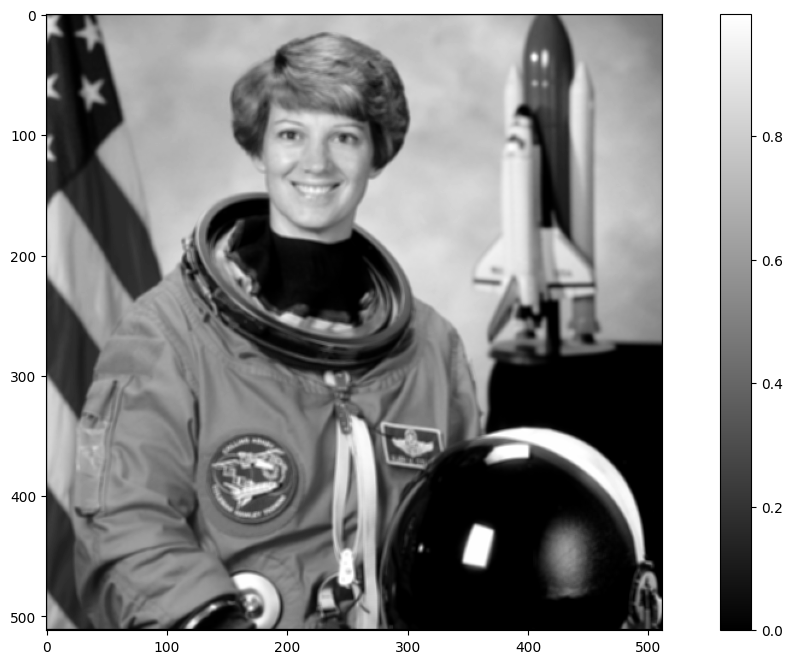

In [14]:
img_mean = meanfilter(img, 3)
plt.figure(figsize=(15,8))
plt.imshow(img_mean, 'gray')
plt.colorbar()

Then, compare your result for filter size `5` with the correct result image `data/astronaut_medianfilter5.png`:

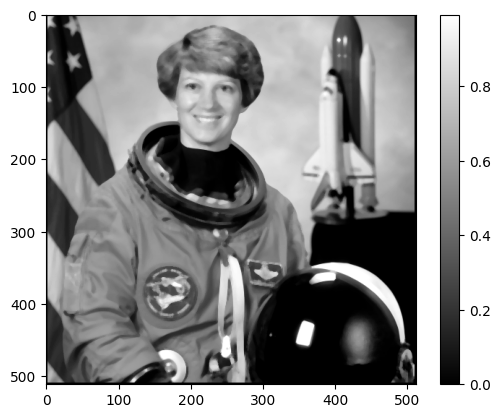

In [16]:
medianf_5_ref = plt.imread('data/astronaut_medianfilter5.png')
plt.imshow(medianf_5_ref, 'gray')
plt.colorbar()

---

## Using pre-implemented filters

**<a id="#">Task 3.3.1.</a>** Load the package `scipy.ndimage`:

**<a id="#">Task 3.3.2 (a).</a>** Apply a **mean filter** from `scipy.ndimage` to the loaded image:

**<a id="#">Task 3.3.2 (b).</a>** Apply a **median filter** from `scipy.ndimage` to the loaded image:

**<a id="#">Task 3.3.2 (c).</a>** Apply a **Gaussian filter** from `scipy.ndimage` to the loaded image:

**<a id="#">Task 3.3.3.</a>** Compare the results obtained using the functions from `scipy.ndimage` with those you obtained using your own implementations. What are the main differences? Do you have an explanation?

---

## Slicing and benchmarking

**<a id="#">Task 3.4.2.</a>** Implement either a mean filter or a median filter using only a single `for`-loop:

In [ ]:
def fastfilter(img_in, size):
    ...

**<a id="#">Task 3.4.3.</a>** First, test your implementation from above by using the function `fastfilter` for the previously loaded image and show the result:

Then, compare your result to those obtained using your implementation for either `meanfilter` or `medianfilter`, respectively:

**<a id="#">Task 3.4.4.</a>** Benchmark the code run times:

**<a id="#">Task 3.4.5.</a>** Document your observations regarding the benchmarking results and try to think of an explanation: